In [1]:
import scanpy as sc
import pandas as pd
import infercnvpy as cnv
import sys
import os 
sys.path.append(os.path.expanduser(f"~/SSS_mount/insituCNV/InSituCNV"))
import insitucnv as icv

## No smooting

221 has 2303 cells and 14151 genes


  0%|          | 0/1 [00:00<?, ?it/s]

categories: 0, non-epi
var_group_labels: chr1, chr2, chr3, etc.


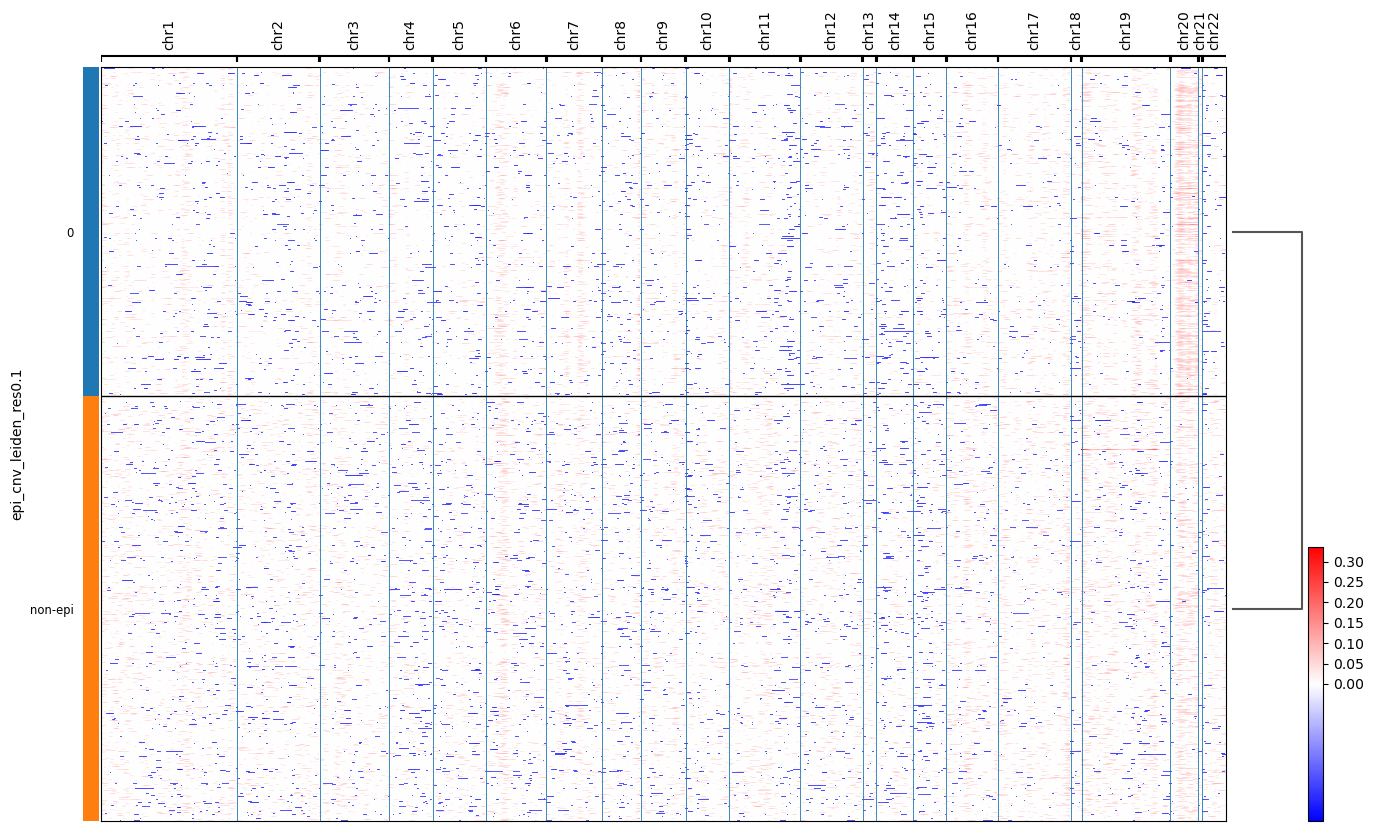

saving  epi_cnv_leiden_res0.1 ...


In [3]:
SIDs = ['221'] 

for sid in SIDs:
    adata = sc.read(os.path.expanduser(f"~/SSS_mount/insituCNV/data/WTx-CosMx_TVA/round2/snPATHOseq/snPATHOseq_{sid}.h5ad"))
    print(sid, 'has', adata.n_obs, 'cells and', adata.n_vars, 'genes')    
    
    adata.X = adata.layers['raw'].copy()
    sc.pp.normalize_total(adata)
    sc.pp.log1p(adata)
      
    cnv.tl.infercnv(adata, 
                    reference_key = 'lv1',
                    reference_cat = ['fib1', 'fib2', 'mast', 'mye1', 'mye2','BC', 'EC', 'PC_IgA', 'PC_IgG', 'PC_IgM', 'SMC', 'TC'],
                    window_size=100)
    
    adata_epi = adata[adata.obs.lv1.isin(['epi1', 'epi2', 'epi3', 'epi4','Uknown'])].copy()
    cnv.tl.pca(adata_epi)    
    cnv.pp.neighbors(adata_epi)
    
    resolutions=[0.1]
    
    for res in resolutions:    
        key_added=f'epi_cnv_leiden_res{res}'
        cnv.tl.leiden(adata_epi, resolution = res, key_added=key_added)
        adata.obs[key_added] = 'non-epi'
        adata.obs.loc[adata_epi.obs_names, key_added] = adata_epi.obs[key_added]
        
        adata.obs[key_added] = adata.obs[key_added].astype("category")
        sc.tl.dendrogram(adata, groupby=key_added)

        save_heatmap = f"_snPATHOseq_{sid}_no_smooth_groupby-{key_added}.pdf"
        cnv.pl.chromosome_heatmap(adata, groupby=key_added, dendrogram=True, save=save_heatmap) 
 
    print('saving ', key_added, '...')
    
    # adata.write(os.path.expanduser(f"~/SSS_mount/insituCNV/data/WTx-CosMx_TVA/round2/snPATHOseq/snPATHOseq_{sid}_CNVinf_no_smoothing.h5ad"), compression='gzip')

## Different number of neighbors for smoothing

221 has 2303 cells and 14151 genes


  0%|          | 0/1 [00:00<?, ?it/s]

categories: 0, 1, non-epi
var_group_labels: chr1, chr2, chr3, etc.


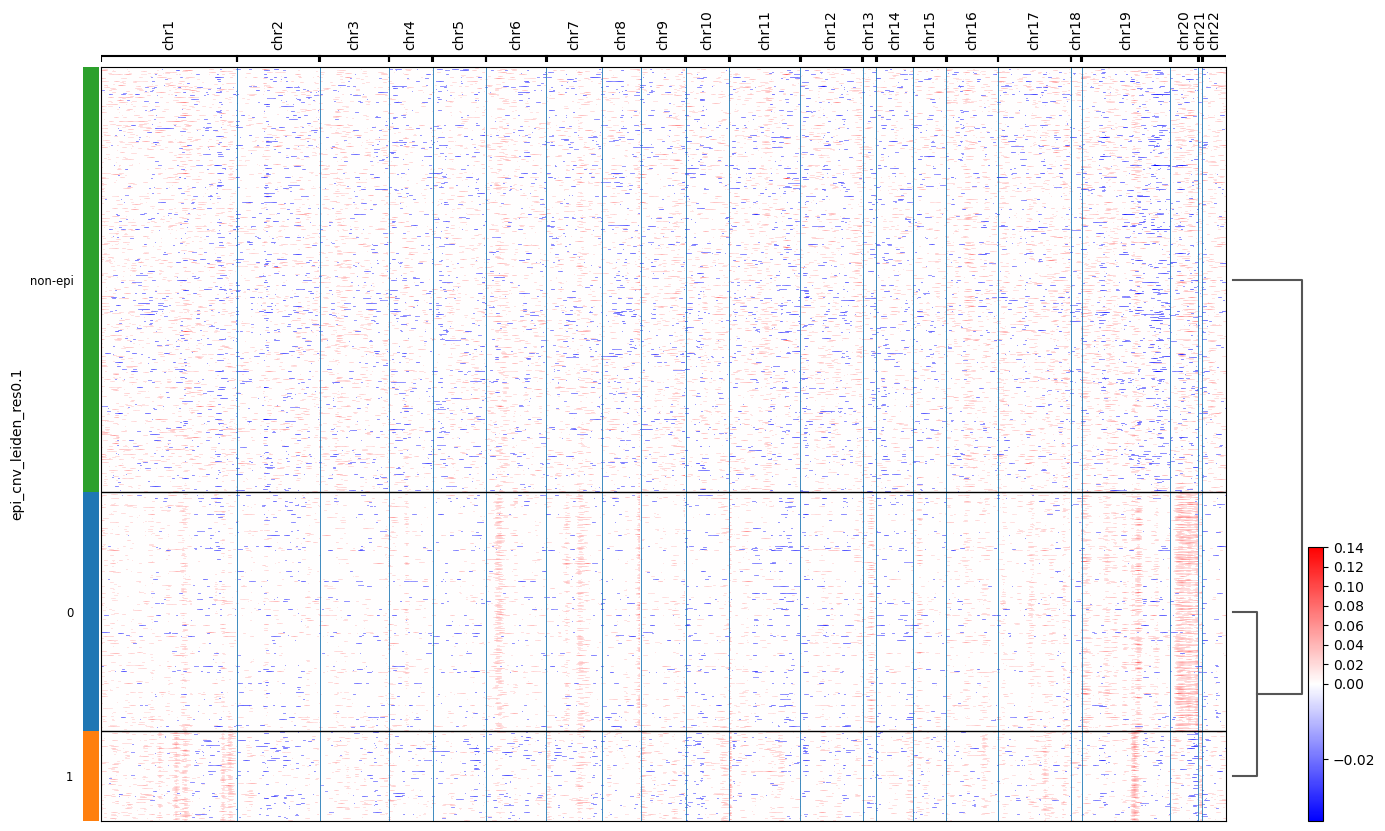

saving  epi_cnv_leiden_res0.1 ...
221 has 2303 cells and 14151 genes


  0%|          | 0/1 [00:00<?, ?it/s]

categories: 0, 1, 2, etc.
var_group_labels: chr1, chr2, chr3, etc.


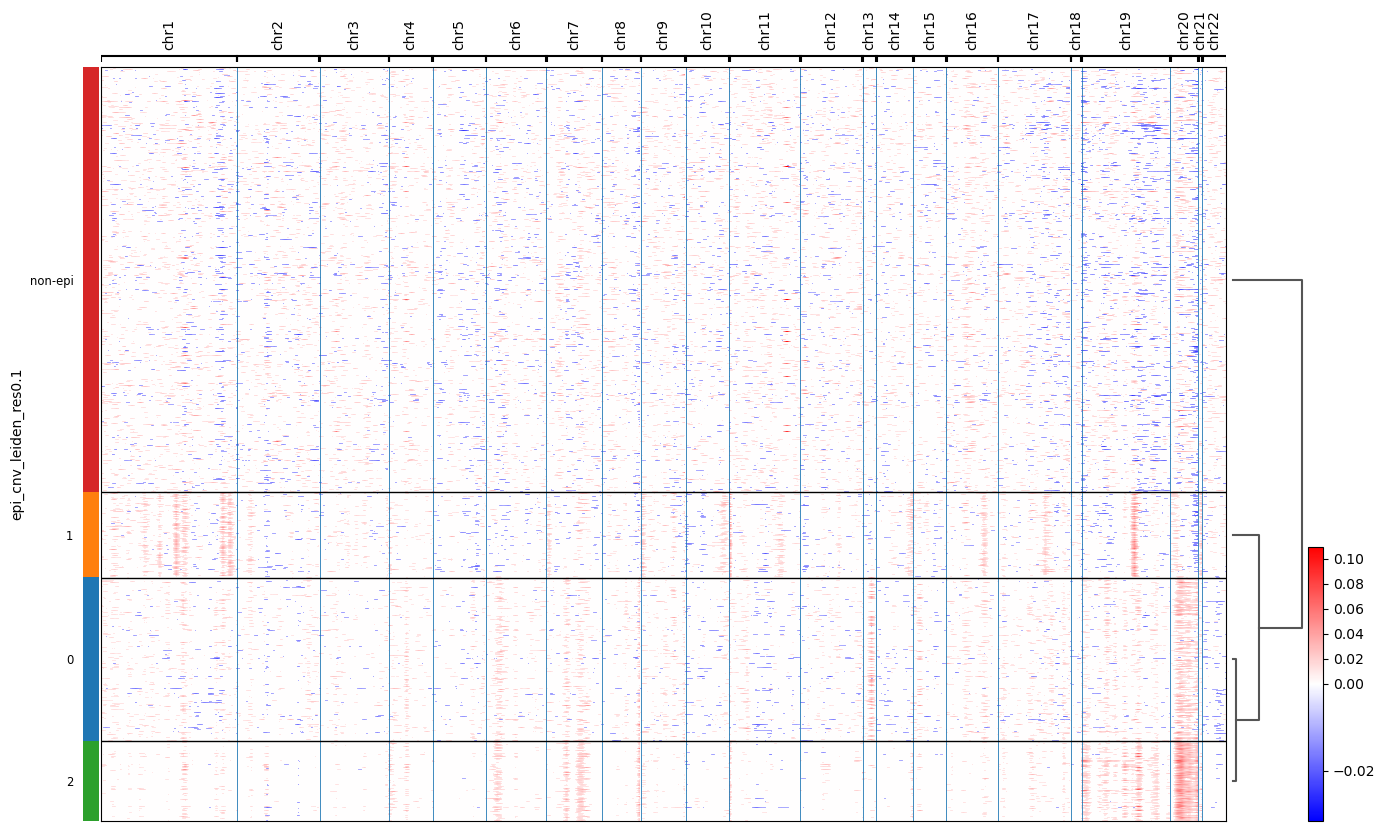

saving  epi_cnv_leiden_res0.1 ...
221 has 2303 cells and 14151 genes


  0%|          | 0/1 [00:00<?, ?it/s]

categories: 0, 1, 2, etc.
var_group_labels: chr1, chr2, chr3, etc.


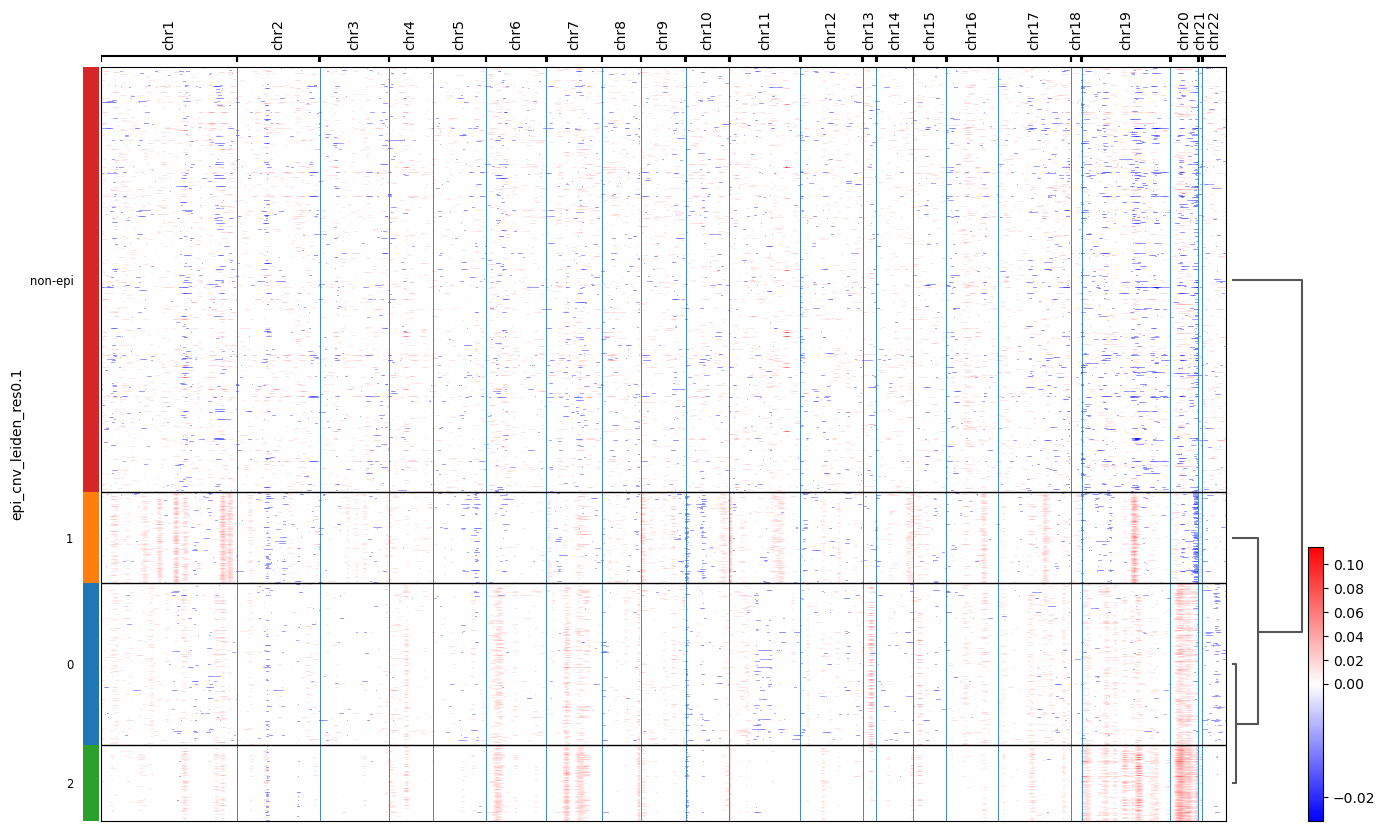

saving  epi_cnv_leiden_res0.1 ...
221 has 2303 cells and 14151 genes


  0%|          | 0/1 [00:00<?, ?it/s]

categories: 0, 1, 2, etc.
var_group_labels: chr1, chr2, chr3, etc.


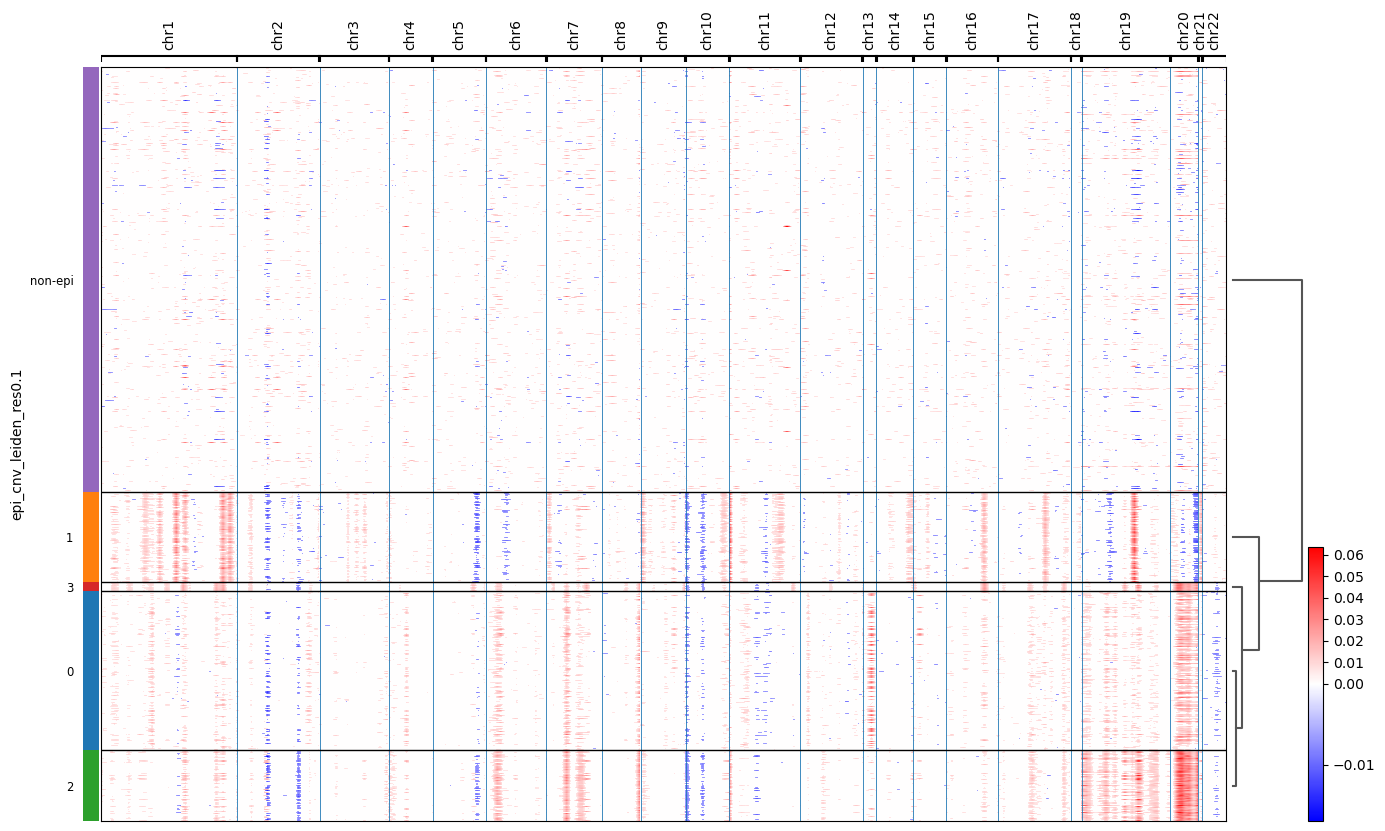

saving  epi_cnv_leiden_res0.1 ...
221 has 2303 cells and 14151 genes


  0%|          | 0/1 [00:00<?, ?it/s]

categories: 0, 1, 2, etc.
var_group_labels: chr1, chr2, chr3, etc.


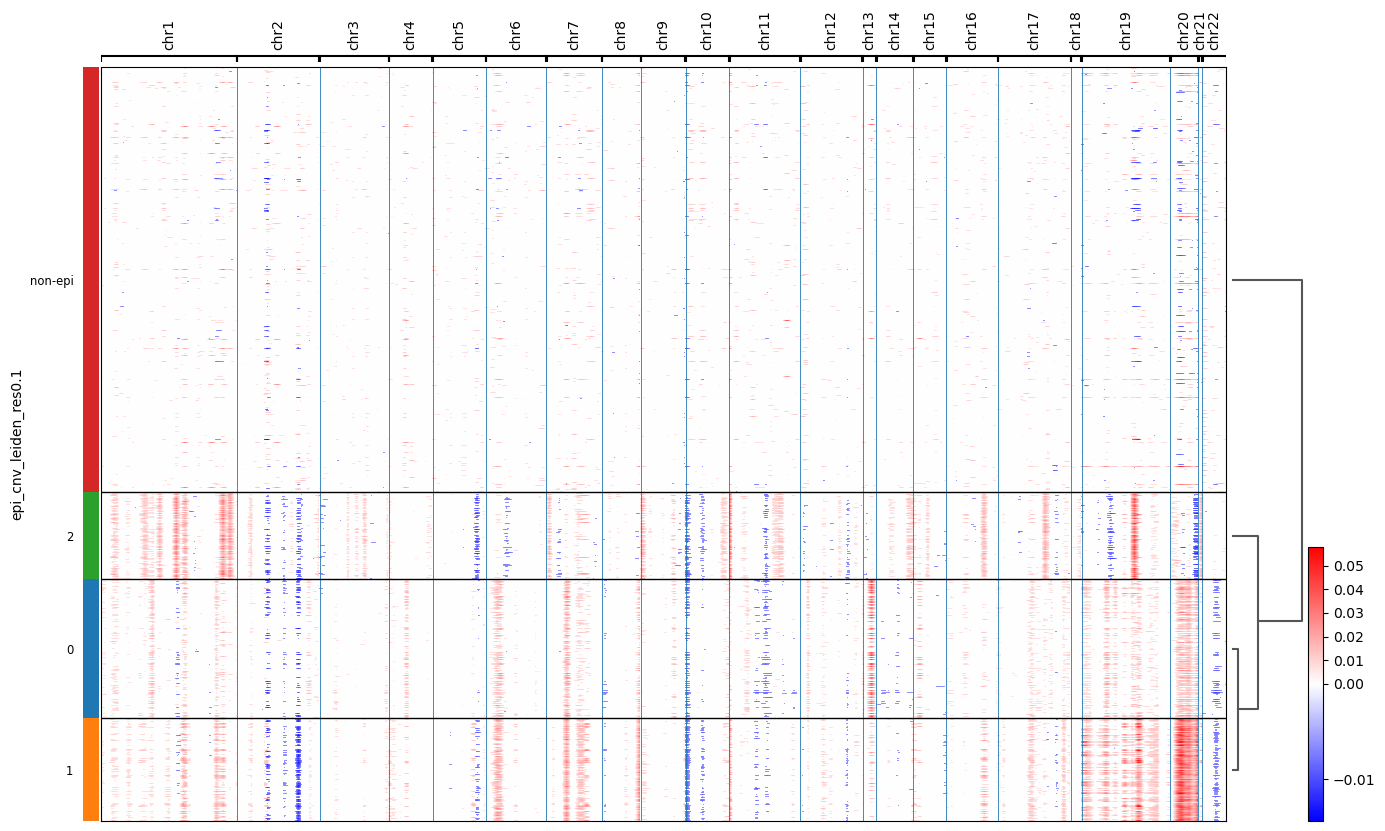

saving  epi_cnv_leiden_res0.1 ...
221 has 2303 cells and 14151 genes


  0%|          | 0/1 [00:00<?, ?it/s]

categories: 0, 1, 2, etc.
var_group_labels: chr1, chr2, chr3, etc.


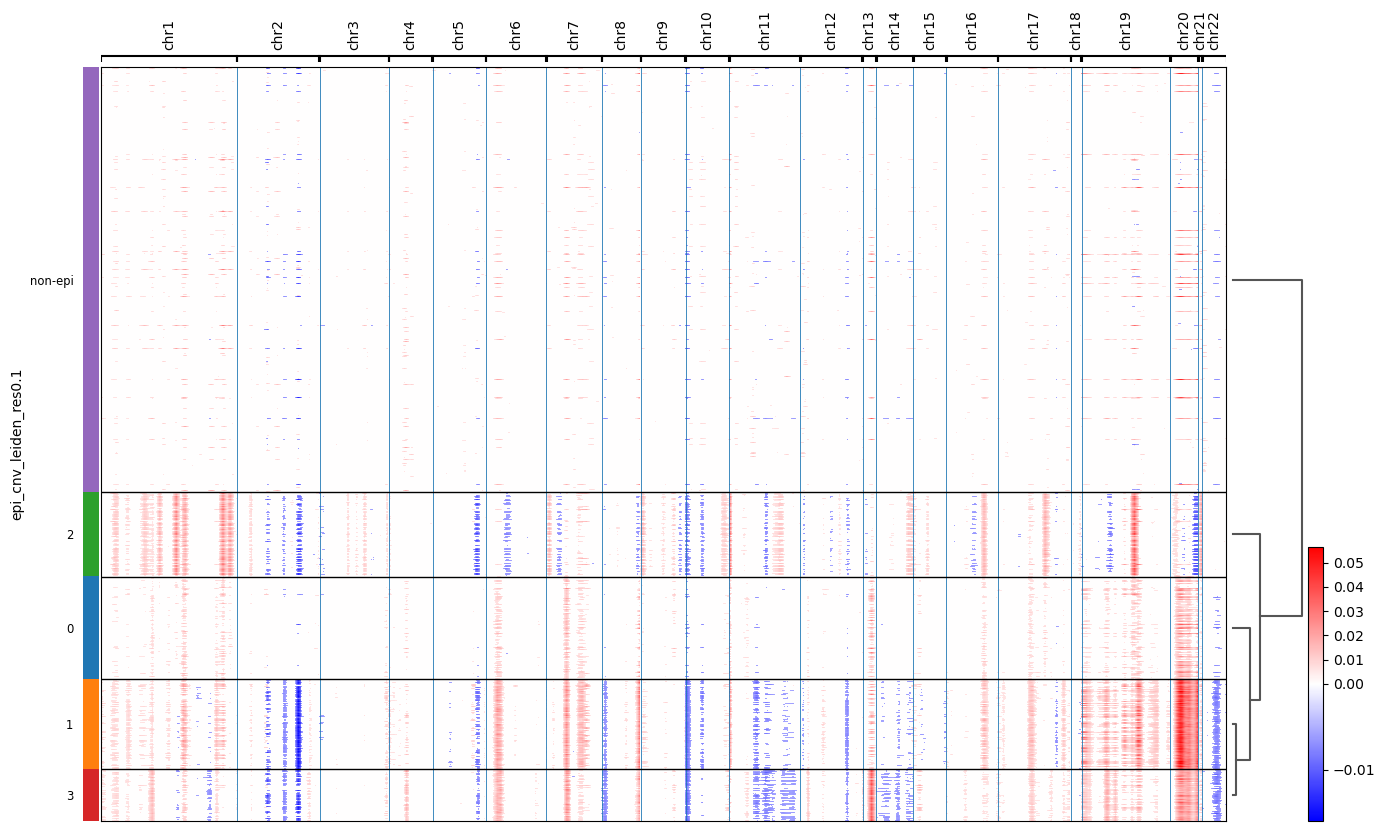

saving  epi_cnv_leiden_res0.1 ...


In [2]:
neighbors = [2, 5, 10, 30, 50, 100]

sid ='221'

for n_neigh in neighbors:
    adata = sc.read(os.path.expanduser(f"~/SSS_mount/insituCNV/data/WTx-CosMx_TVA/round2/snPATHOseq/snPATHOseq_{sid}.h5ad"))
    print(sid, 'has', adata.n_obs, 'cells and', adata.n_vars, 'genes')    
    
    # Smooth the data
    adata.X = adata.layers['logcounts'].copy()
    sc.pp.pca(adata)
    sc.pp.neighbors(adata, n_neighbors=100)

    adata.X = adata.layers['raw'].copy()
    sc.pp.normalize_total(adata)

    adata.layers['raw'] = adata.X.copy()
    icv.tl.smooth_data_for_cnv(adata, n_neighbors=n_neigh)
    adata.X = adata.layers['M'].copy()
    sc.pp.normalize_total(adata)
    sc.pp.log1p(adata)
      
    cnv.tl.infercnv(adata, 
                    reference_key = 'lv1',
                    reference_cat = ['fib1', 'fib2', 'mast', 'mye1', 'mye2','BC', 'EC', 'PC_IgA', 'PC_IgG', 'PC_IgM', 'SMC', 'TC'],
                    window_size=100)
    
    adata_epi = adata[adata.obs.lv1.isin(['epi1', 'epi2', 'epi3', 'epi4','Uknown'])].copy()
    cnv.tl.pca(adata_epi)    
    cnv.pp.neighbors(adata_epi)
    
    resolutions=[0.1]
    
    for res in resolutions:    
        key_added=f'epi_cnv_leiden_res{res}'
        cnv.tl.leiden(adata_epi, resolution = res, key_added=key_added)
        adata.obs[key_added] = 'non-epi'
        adata.obs.loc[adata_epi.obs_names, key_added] = adata_epi.obs[key_added]
        
        adata.obs[key_added] = adata.obs[key_added].astype("category")
        sc.tl.dendrogram(adata, groupby=key_added)

        save_heatmap = f"_snPATHOseq_{sid}_smooth_n_{n_neigh}_groupby-{key_added}.pdf"
        cnv.pl.chromosome_heatmap(adata, groupby=key_added, dendrogram=True, save=save_heatmap) 
 
    print('saving ', key_added, '...')

221 has 2303 cells and 14151 genes


  0%|          | 0/1 [00:00<?, ?it/s]

categories: 0, 1, 2, etc.
var_group_labels: chr1, chr2, chr3, etc.


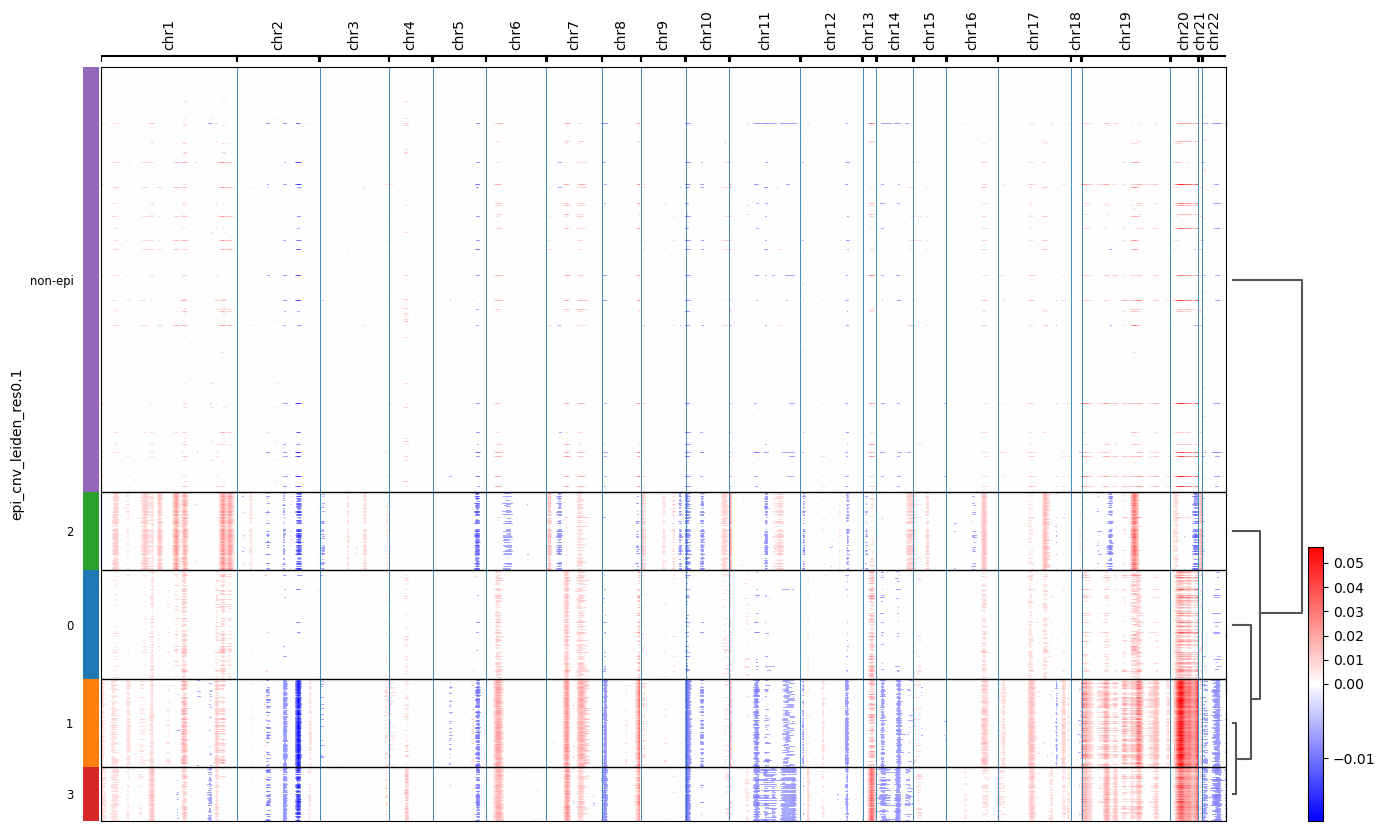

saving  epi_cnv_leiden_res0.1 ...
221 has 2303 cells and 14151 genes


  0%|          | 0/1 [00:00<?, ?it/s]

categories: 0, 1, 2, etc.
var_group_labels: chr1, chr2, chr3, etc.


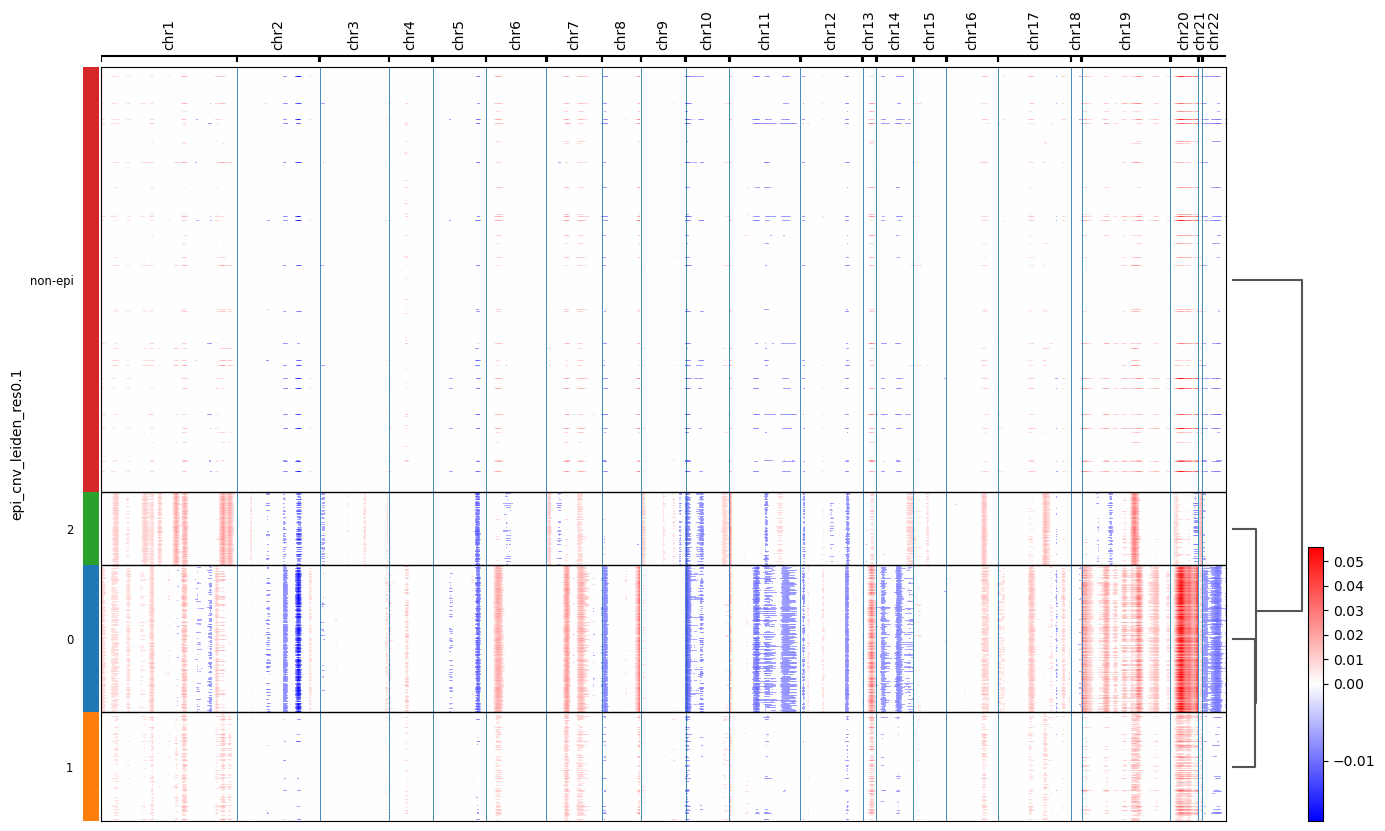

saving  epi_cnv_leiden_res0.1 ...
221 has 2303 cells and 14151 genes


  0%|          | 0/1 [00:00<?, ?it/s]

categories: 0, 1, 2, etc.
var_group_labels: chr1, chr2, chr3, etc.


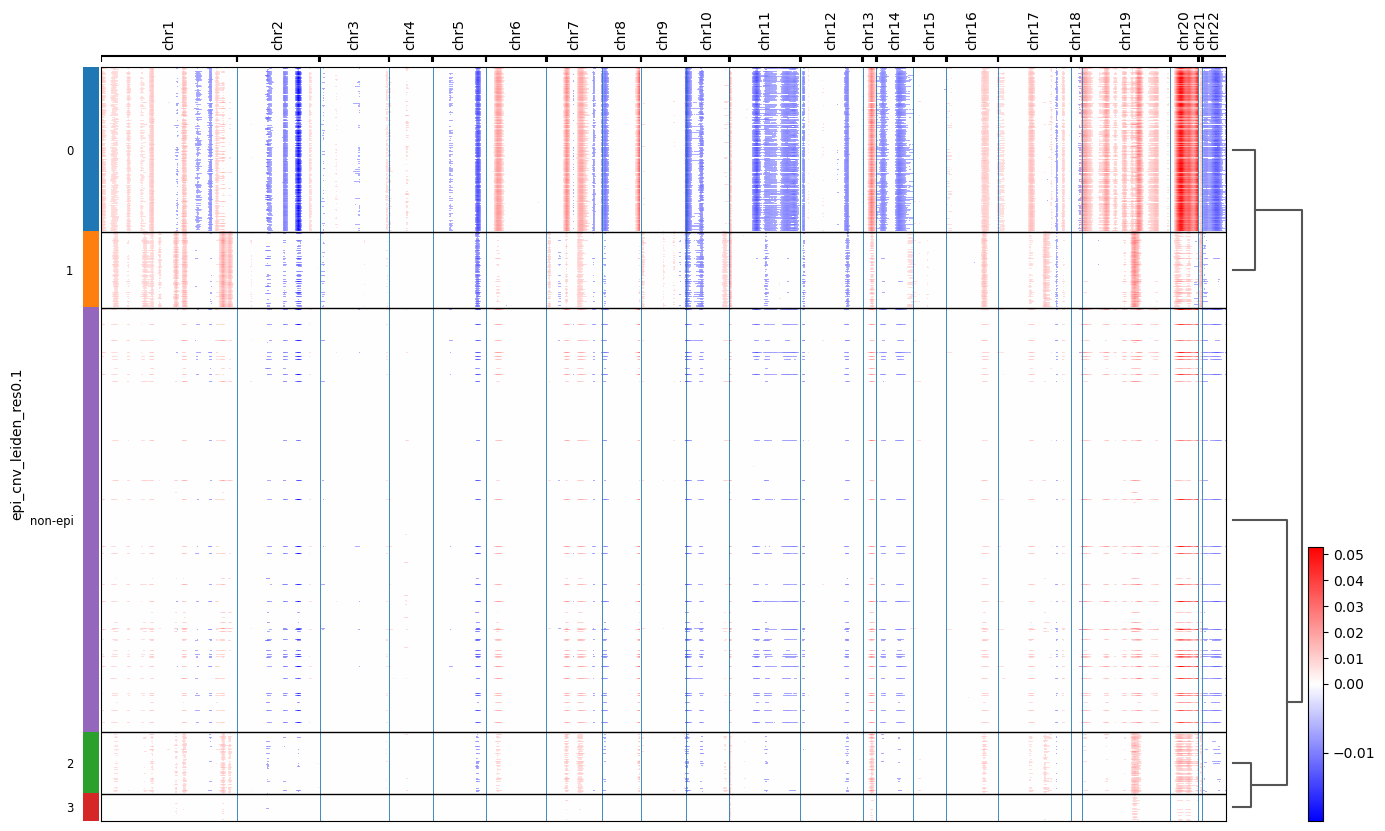

saving  epi_cnv_leiden_res0.1 ...


In [2]:
neighbors = [200, 300, 400]

sid ='221'

for n_neigh in neighbors:
    adata = sc.read(os.path.expanduser(f"~/SSS_mount/insituCNV/data/WTx-CosMx_TVA/round2/snPATHOseq/snPATHOseq_{sid}.h5ad"))
    print(sid, 'has', adata.n_obs, 'cells and', adata.n_vars, 'genes')    
    
    # Smooth the data
    adata.X = adata.layers['logcounts'].copy()
    sc.pp.pca(adata)
    sc.pp.neighbors(adata, n_neighbors=400)

    adata.X = adata.layers['raw'].copy()
    sc.pp.normalize_total(adata)

    adata.layers['raw'] = adata.X.copy()
    icv.tl.smooth_data_for_cnv(adata, n_neighbors=n_neigh)
    adata.X = adata.layers['M'].copy()
    sc.pp.normalize_total(adata)
    sc.pp.log1p(adata)
      
    cnv.tl.infercnv(adata, 
                    reference_key = 'lv1',
                    reference_cat = ['fib1', 'fib2', 'mast', 'mye1', 'mye2','BC', 'EC', 'PC_IgA', 'PC_IgG', 'PC_IgM', 'SMC', 'TC'],
                    window_size=100)
    
    adata_epi = adata[adata.obs.lv1.isin(['epi1', 'epi2', 'epi3', 'epi4','Uknown'])].copy()
    cnv.tl.pca(adata_epi)    
    cnv.pp.neighbors(adata_epi)
    
    resolutions=[0.1]
    
    for res in resolutions:    
        key_added=f'epi_cnv_leiden_res{res}'
        cnv.tl.leiden(adata_epi, resolution = res, key_added=key_added)
        adata.obs[key_added] = 'non-epi'
        adata.obs.loc[adata_epi.obs_names, key_added] = adata_epi.obs[key_added]
        
        adata.obs[key_added] = adata.obs[key_added].astype("category")
        sc.tl.dendrogram(adata, groupby=key_added)

        save_heatmap = f"_snPATHOseq_{sid}_smooth_n_{n_neigh}_groupby-{key_added}.pdf"
        cnv.pl.chromosome_heatmap(adata, groupby=key_added, dendrogram=True, save=save_heatmap) 
 
    print('saving ', key_added, '...')